In [1]:
# Run this code when reset session
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import subprocess
!python '/content/gdrive/My Drive/projects/ml_projects/colab_setup.py'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/projects/ml_projects')
%load_ext autoreload
%autoreload 2

In [0]:
# Third-party imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import copy

# Local imports
# from ml_projects.helpers import plot_by_feature

In [0]:
# Dataset source: https://www.kaggle.com/CooperUnion/cardataset/data
# I uploaded this dataset to my github for convenience
data_url = 'https://raw.githubusercontent.com/alexjdata/ml_projects/master/ml_projects/linear_regression/car_dataset.csv'
data_df = pd.read_csv(data_url)

In [0]:
# data_df.head()

In [0]:
train_df, test_df = train_test_split(data_df, test_size=0.2)

In [0]:
class MultivariateLinearRegression(object):
    def __init__(self, training_df, input_features, output_feature):
        # Parameters
        self.X_labels = input_features + ['x_0']
        self.Y_label = output_feature

        # Attributes
        self.Theta = None
        self.X = None
        self.Y = None
        self.alpha = None
        self.cost_list = None
        self.iteration_list = None
        self.m = None
        self.training_df = None
        
        # Call methods
        self.set_training_set(training_df)


    def set_training_set(self, training_df):
        training_df = training_df.copy()
        count_null_values = len(training_df) - len(training_df.dropna())
        if count_null_values > 0:
            print(f'Dropped {count_null_values} null rows of training set')
            training_df.dropna(inplace = True)
        training_df['x_0'] = 1

        self.training_df = training_df[self.X_labels+[self.Y_label]].copy()
        self.X = np.array(self.training_df[self.X_labels])
        self.Y = np.array(self.training_df[[self.Y_label]])
        self.m = len(self.training_df)
        self.Theta = np.zeros((1, len(self.X_labels)))


    def set_learning_rate(self, learning_rate):
        self.alpha = learning_rate

    
    def train(self):
        print('Start training.')
        cost = self.calculate_cost(self.training_df)
        self.cost_list = [cost]
        self.iteration_list = [0]
        print(f'Initial cost: {cost}')

        t = 1
        is_continue = True
        while is_continue:
            self.calculate_gradient_descent()

            cost = self.calculate_cost(self.training_df)
            print(f'Iterate: {t}, new cost: {cost}')

            self.cost_list.append(cost)
            self.iteration_list.append(t)
            t += 1

            if self.cost_list[-1] > self.cost_list[-2]:
                print('Cost is increasing. Please set a lower learning rate ') 
                break
            elif (self.cost_list[-1] - self.cost_list[-2])*100/self.cost_list[-2] > -0.0001:
                is_continue = False
                print(f'Finish training. Theta: \n+{self.X_labels}\n+{self.Theta}')
                self.draw_model()
                self.draw_cost_plot()

    
    def test(self):
        pass


    def calculate_cost(self, data_df):
        data_df = data_df.copy()
        data_df['x_0'] = 1
        X = np.array(data_df[self.X_labels])
        Y = np.array(data_df[[self.Y_label]])

        cost = np.sum((np.dot(X, self.Theta.T) - Y)**2) / (2*self.m)
        return cost


    def calculate_gradient_descent(self):
        Y_bar_Y_dif = np.dot(self.X, self.Theta.T) - self.Y
        Theta_derive = np.sum(self.X * Y_bar_Y_dif, axis=0) / self.m
        self.Theta += - self.alpha*Theta_derive


    def predict(self, input_values):
        input_values = copy.deepcopy(input_values)
        input_values.append(1)
        input_array = np.array(input_values)
        output_value = np.dot(input_array, self.Theta.T)
        print(f'Predicted value: {output_value}')
        return output_value


    def draw_model(self):
        pass

    
    def draw_cost_plot(self):
        pass

In [0]:
car_prediction_model = MultivariateLinearRegression(
    training_df = train_df, 
    input_features = ['Year', 'Engine HP'],
    output_feature = 'MSRP'
)
car_prediction_model.set_learning_rate(0.0000004)

Dropped 3047 null rows of training set


In [0]:
car_prediction_model.train()

Start training.
Initial cost: 3389580857.51095
Iterate: 1, new cost: 2664853433.0605803
Iterate: 2, new cost: 2353476182.1226487
Iterate: 3, new cost: 2216572233.457146
Iterate: 4, new cost: 2153344908.8260856
Iterate: 5, new cost: 2121261632.2391093
Iterate: 6, new cost: 2102374860.489156
Iterate: 7, new cost: 2089110917.0583098
Iterate: 8, new cost: 2078273471.2488933
Iterate: 9, new cost: 2068513255.8149266
Iterate: 10, new cost: 2059260393.022166
Iterate: 11, new cost: 2050273880.6110957
Iterate: 12, new cost: 2041451493.561488
Iterate: 13, new cost: 2032749570.4907224
Iterate: 14, new cost: 2024149166.7961648
Iterate: 15, new cost: 2015641772.6349328
Iterate: 16, new cost: 2007223286.451563
Iterate: 17, new cost: 1998891472.003949
Iterate: 18, new cost: 1990644885.281166
Iterate: 19, new cost: 1982482421.6550474
Iterate: 20, new cost: 1974403124.7451322
Iterate: 21, new cost: 1966406105.7162957
Iterate: 22, new cost: 1958490509.1748993
Iterate: 23, new cost: 1950655498.7280934
Ite

In [0]:
car_prediction_model.predict([2010, 700])

Predicted value: [213037.00615496]


array([213037.00615496])

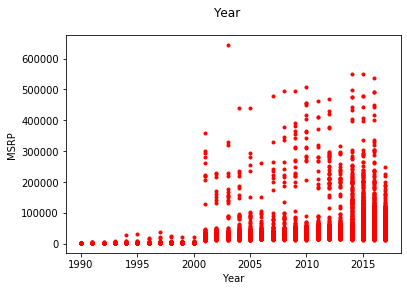

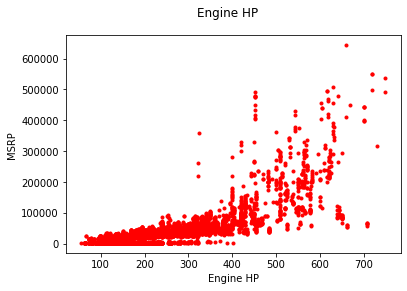

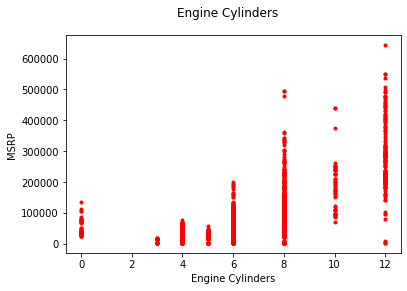

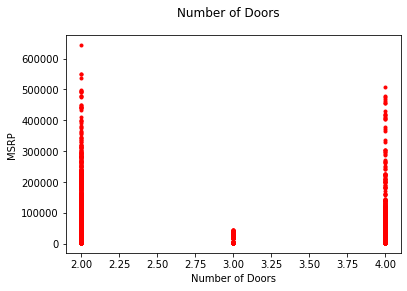

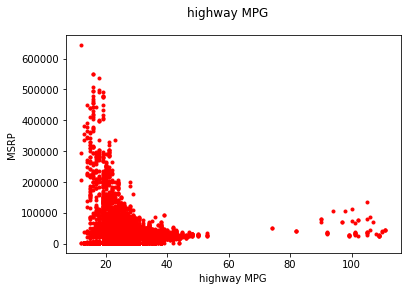

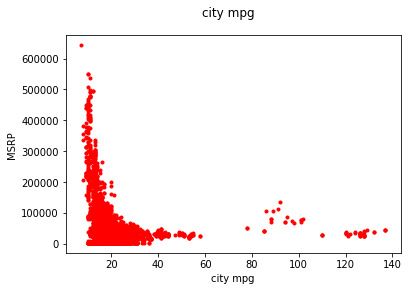

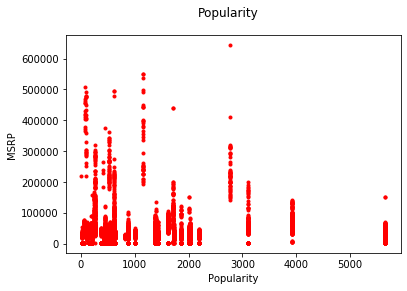

In [0]:
train_removed_outlier_df = train_df.copy()
train_removed_outlier_df = train_removed_outlier_df[
    (train_removed_outlier_df['MSRP']<=1000000) 
    & (train_removed_outlier_df['highway MPG']<=350)
]
plot_by_feature(df_ = train_removed_outlier_df, output_feature='MSRP')

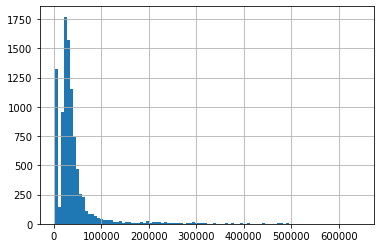

In [0]:
train_df[train_df['MSRP']<=1000000]['MSRP'].hist(bins=100)

In [0]:
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])